## MINI PROJECT : DATA ANALYSIS-DATA VISUALIZATION (ADULT CENSUS INCOME)
## Kelompok 3
1. Claudia Venesiatan
2. Sela Tri Indah Sari
3. Luthfi Sifa Khaerunnisa
4. Fahryan Putra Ramadi
5. Ngurah Gede Ivan Satya Wibawa

**The goal is to simulate a Data Analyst's ETL workflow, focusing on preprocessing and statistical analysis to predict income levels based on demographic factors.**

Income inequality is a critical issue in society, and understanding factors that influence income levels can provide valuable insights. This dataset contains information on various demographic attributes such as age, education, occupation, and work hours. We analyze the Adult Census Income dataset to uncover patterns and trends. By analyzing variables such as age, education, occupation, and hours worked per week. We aim to find answers like which demographics are more likely to earn above $50,000 per year. Can we find meaningful correlations? Which attributes are the most significant predictors of income level? And how do different factors, like education and occupation, influence earning potential?

**Coloumns Descriptions :**

**Age =** Age of the individual in years.

**Workclass =** Employment status (e.g., Private, Self-employed, Government).

**Education =** Highest level of education achieved (e.g., Bachelors, HS-grad).

**Education-num =** Number of years for which education was taken.

**Marital-status =** Marital status (e.g., Married, Never-married, Divorced).

**Occupation =** Type of job (e.g., Tech-support, Craft-repair, Sales).

**Relationship =** Relationship within a family (e.g., Husband, Wife, Unmarried).

**Race =** Race of the individual (e.g., White, Black, Asian-Pac-Islander).

**Sex =** Gender of the individual (Male or Female).

**Capital-gain =** Capital gained by a person.

**Capital-loss =** Loss of capital for a person

**Hours-per-week =** Average hours worked per week.

**Native-country =** Country of origin (e.g., United-States, Canada, Mexico).

**Income =** Target variable indicating income category: <=50K or >50K.

**FNLWGT =** An estimate of how many people belong to this set of combination.

In [10]:
# Import Libraries
import numpy as np
import pandas as pd

# Import Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [12]:
# load Data from Local File
df = pd.read_csv("data/adult.csv")

## Data Quality Assessment

In [15]:
# Show Upper Data
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [17]:
# Show Bottom Data
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
# Check Number of Row and Columns
df.shape

(32561, 15)

In [21]:
# Show Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [23]:
# Check Documentation
df.info?

Signature:
df.info(
    verbose: 'bool | None' = None,
    buf: 'WriteBuffer[str] | None' = None,
    max_cols: 'int | None' = None,
    memory_usage: 'bool | str | None' = None,
    show_counts: 'bool | None' = None,
) -> 'None'
Docstring:
Print a concise summary of a DataFrame.

This method prints information about a DataFrame including
the index dtype and columns, non-null values and memory usage.

Parameters
----------
verbose : bool, optional
    Whether to print the full summary. By default, the setting in
    ``pandas.options.display.max_info_columns`` is followed.
buf : writable buffer, defaults to sys.stdout
    Where to send the output. By default, the output is printed to
    sys.stdout. Pass a writable buffer if you need to further process
    the output.
max_cols : int, optional
    When to switch from the verbose to the truncated output. If the
    DataFrame has more than `max_cols` columns, the truncated output
    is used. By default, the setting in
    ``pandas.options

In [25]:
# Show Missing
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Data Type Transformation

In [28]:
# Data Type Before Transforming
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [30]:
# Convert relevant columns to category type
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
df[categorical_columns] = df[categorical_columns].astype('category')

In [32]:
# Replace "?" with NaN for easier handling of missing data
df.replace("?", np.nan, inplace=True)

In [34]:
# Check the data to ensure "?" values have been replaced
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90       NaN   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66       NaN  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                NaN  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                NaN      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [36]:
#data type after transforming
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  category
 6   occupation      30718 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  31978 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


## Detecting and Handling  Missing Value

In [39]:
# Detect Missing Value Percentage
missing_values = df.isnull().sum()
total_values = df.shape[0]

percentage_missing = round((missing_values / total_values) * 100, 2)

print(percentage_missing)

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education.num     0.00
marital.status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    1.79
income            0.00
dtype: float64


In [41]:
# Check Missing Values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

### Handling Missing Value

In [44]:
# categorical columns with missing values
categorical_columns_with_missing = ['workclass', 'occupation', 'native.country']

In [46]:
# Ensure categorical columns have "Unknown" as a category before filling
for column in categorical_columns_with_missing:
    df[column] = df[column].astype('category')
    # Add "Unknown" as a category
    df[column] = df[column].cat.add_categories("Unknown")
    # Fill missing values with "Unknown"
    df[column].fillna("Unknown", inplace=True)

In [48]:
# Impute missing values in categorical columns with "Unknown"
df[categorical_columns_with_missing] = df[categorical_columns_with_missing].fillna("Unknown")

In [50]:
# Check Missing Values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Detecting and Handling outliers 

In [53]:
df_num = df.select_dtypes(include = ["int64"])

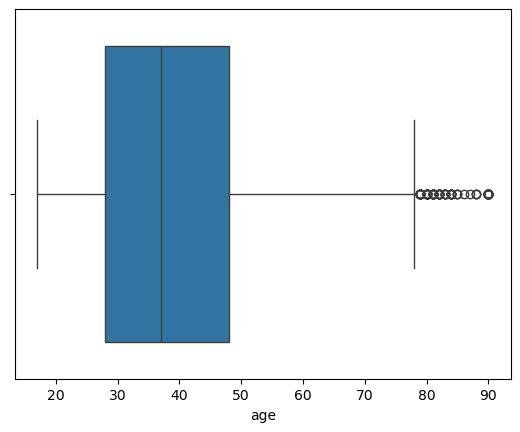

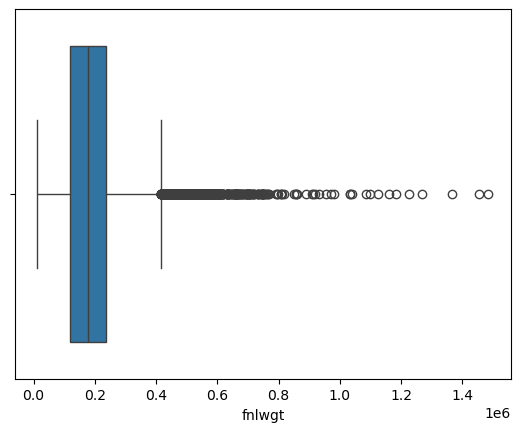

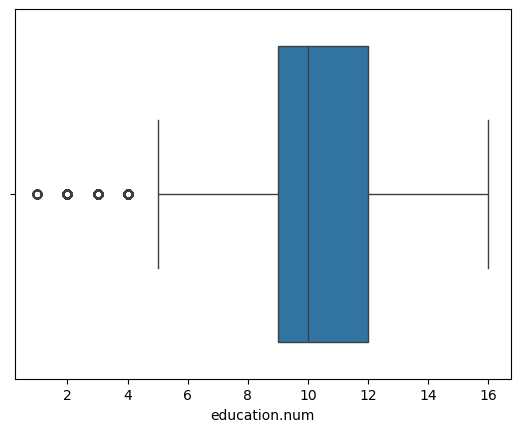

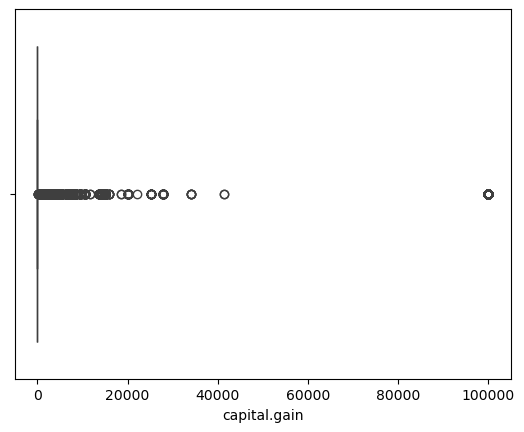

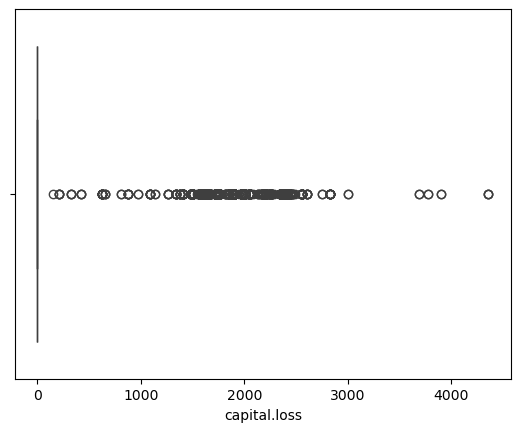

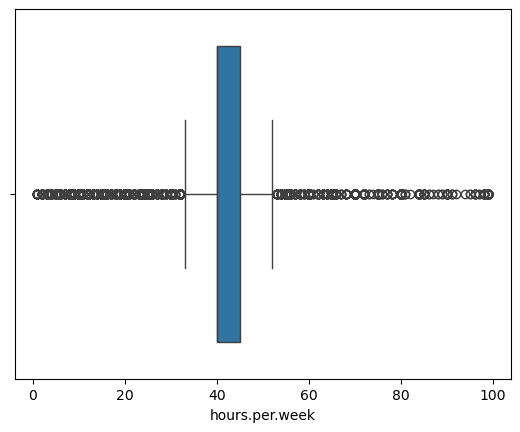

In [55]:
## Detecting Outlier by visualization using Boxplot
df_num = df.select_dtypes(include=["int64"])
for i in df_num:
    sns.boxplot(data=df_num, x = i)
    plt.show()

### Detecting & Removing Outliers Punya Ivan

In [57]:
import numpy as np
columns_to_check = df_num.columns 

def find_outlier2(column):
    # Taking only the values from the column, sorting it and convert to a list
    data = df[column].sort_values().values.tolist()
    
    # Calculate the Q1 and Q3 value
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)

    # Calculate the IQR value
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR

    # Find lower and higher outliers
    low_out = [i for i in data if i < min_IQR]
    high_out = [i for i in data if i > max_IQR]

    # Prepare the output format for lower outlier
    if low_out:
        low_out_display = f"{min(low_out)} to {max(low_out)}"
    else:
        low_out_display = []

    # Prepare the output format for higher outlier
    if high_out:
        high_out_display = f"{min(high_out)} to {max(high_out)}"
    else:
        high_out_display = []

    print('Lower outlier :', low_out_display, '| Higher outlier :', high_out_display)

In [58]:
for c in df_num.columns:
    print(c)
    find_outlier2(c)

age
Lower outlier : [] | Higher outlier : 79 to 90
fnlwgt
Lower outlier : [] | Higher outlier : 415913 to 1484705
education.num
Lower outlier : 1 to 4 | Higher outlier : []
capital.gain
Lower outlier : [] | Higher outlier : 114 to 99999
capital.loss
Lower outlier : [] | Higher outlier : 155 to 4356
hours.per.week
Lower outlier : 1 to 32 | Higher outlier : 53 to 99


In [59]:
# Kumpulkan indeks yang memiliki outlier di kolom yang disebutkan
outlier_indices = set()

for column in columns_to_check:
    # Menghitung Q1, Q3, dan IQR
    Q1 = np.quantile(df[column], 0.25)
    Q3 = np.quantile(df[column], 0.75)
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR

    # Temukan indeks baris dengan nilai outlier
    low_outliers = df[df[column] < min_IQR].index
    high_outliers = df[df[column] > max_IQR].index

    # Tambahkan indeks ke set outlier_indices
    outlier_indices.update(low_outliers)
    outlier_indices.update(high_outliers)

# Hapus baris-baris dengan outlier dari DataFrame
df_cleaned = df.drop(index=outlier_indices)

for column in df_num.columns:
    print(column)
    find_outlier2(column)

print(df_cleaned)

age
Lower outlier : [] | Higher outlier : 79 to 90
fnlwgt
Lower outlier : [] | Higher outlier : 415913 to 1484705
education.num
Lower outlier : 1 to 4 | Higher outlier : []
capital.gain
Lower outlier : [] | Higher outlier : 114 to 99999
capital.loss
Lower outlier : [] | Higher outlier : 155 to 4356
hours.per.week
Lower outlier : 1 to 32 | Higher outlier : 53 to 99
       age         workclass  fnlwgt     education  education.num  \
4232    38           Private  215646       HS-grad              9   
4233    53           Private  234721          11th              7   
4234    28           Private  338409     Bachelors             13   
4235    37           Private  284582       Masters             14   
4237    52  Self-emp-not-inc  209642       HS-grad              9   
...    ...               ...     ...           ...            ...   
32555   53           Private  321865       Masters             14   
32556   22           Private  310152  Some-college             10   
32557   27  

### Descriptive Analysis 

In [62]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. The dataset contains 32,561 records.
2. The average age of the individuals in the dataset is 38.58 years, with a standard deviation of 13.64 years.
3. The average years of education is 10.08, with a standard deviation of 2.57 years.
4. The average capital gain is `$1,077.65`, with a standard deviation of `$7,385.29`.
5. The average capital loss is `$87.30`, with a standard deviation of `$402.96`.
6. The average number of hours worked per week is 40.44, with a standard deviation of 12.35 hours.
7. The minimum age is 17 years, and the maximum age is 90 years.
8. The minimum years of education is 1, and the maximum is 16.
9. The minimum capital gain is `$0`, and the maximum is `$99,999`.
10. The minimum capital loss is `$0`, and the maximum is `$4,356`.
11. The minimum hours worked per week is `1`, and the maximum is `99`.

In [64]:
df.describe(include=["object","category","bool"])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


1. There are 9 unique values for the `workclass` feature, with the most frequent being `Private` with 22,696 occurrences.
2. There are 16 unique values for the `education` feature, with the most frequent being `HS-grad` with 10,501 occurrences.
4. There are 7 unique values for the `marital.status` feature, with the most frequent being `Married-civ-spouse` with 14,976 occurrences.
5. There are 15 unique values for the `occupation` feature, with the most frequent being `Prof-specialty` with 4,140 occurrences.
6. There are 6 unique values for the `relationship` feature, with the most frequent being `Husband` with 13,193 occurrences.
7. There are 5 unique values for the `race` feature, with the most frequent being `White` with 27,816 occurrences.
8. There are 2 unique values for the `sex` feature, with the most frequent being `Male` with 21,790 occurrences.
9. There are 42 unique values for the `native.country` feature, with the most frequent being `United-States` with 29,170 occurrences.
10. There are 2 unique values for the `income` feature, with the most frequent being `<=50K` with 24,720 occurrences.

#### Central tendency

In [70]:
#Computing mean, and median to see the central tendency of each column
central_tendency = pd.DataFrame({
    'Mean': df.select_dtypes(exclude=["object", "bool", "category"]).mean(),
    'Median': df.select_dtypes(exclude=["object", "bool", "category"]).median()
})

print(central_tendency)

                         Mean    Median
age                 38.581647      37.0
fnlwgt          189778.366512  178356.0
education.num       10.080679      10.0
capital.gain      1077.648844       0.0
capital.loss        87.303830       0.0
hours.per.week      40.437456      40.0


We can describe data distribution based on its mean and median values.

- If `Median` = `Mean`: symmetrical distribution
- If `Median` > `Mean`: negative skew distribution
- If `Median` < `Mean`: positive skew distribution

1. We can see from the output above the column `age`'s `Median` is smaller than `Mean` value, which means this column have a positive skew distribution.
2. The column `fnlwgt`'s `Median` is smaller than `Mean` value, which means this column have a positive skew distribution.
3. The `education.num` column has roughly the same `Median` and `Mean` value, which means this column probably have a symmetrical distribution.
4. The column `capital.gain`'s `Median` is smaller than `Mean` value, which means this column have a positive skew distribution.
5. The column `capital.loss`'s `Median` is smaller than `Mean` value, which means this column have a positive skew distribution.
6. The `hours.per.week` column has roughly the same `Median` and `Mean` value, which means this column probably have a symmetrical distribution.
   * Note : In the dataset without outliers `Median` (40) is smaller than `Mean` (41.4) value, which means this column have a positive skew distribution.

#### Using histogram to better visualize the distribution

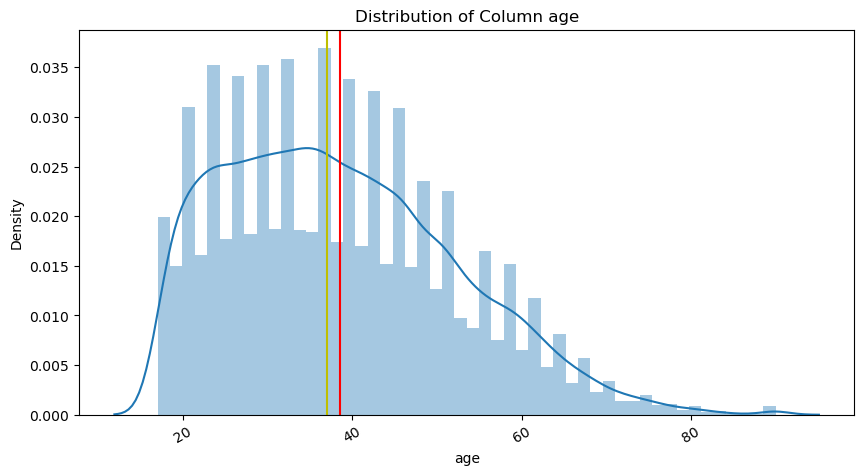

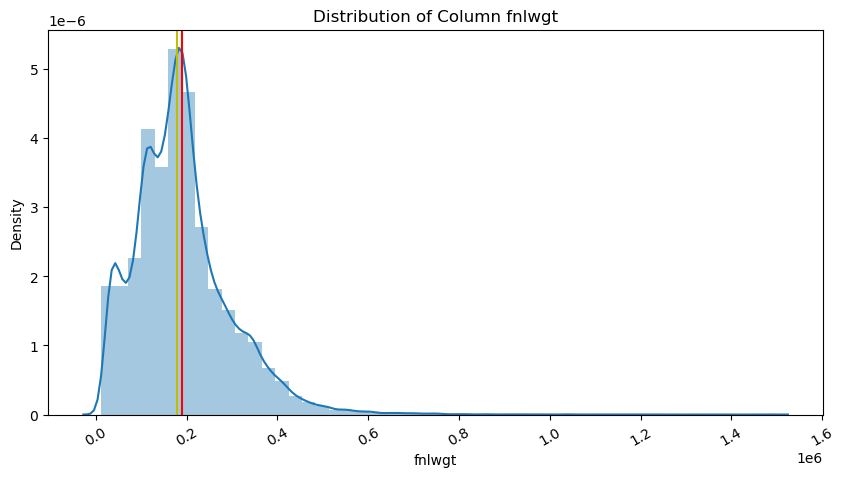

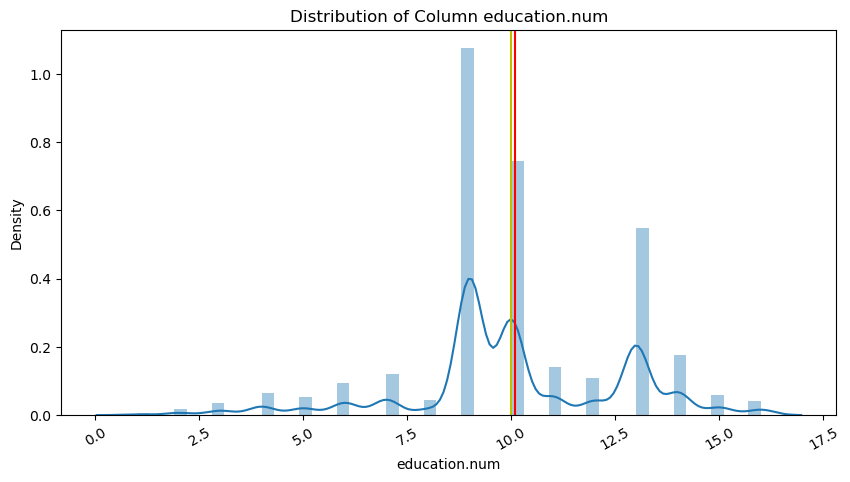

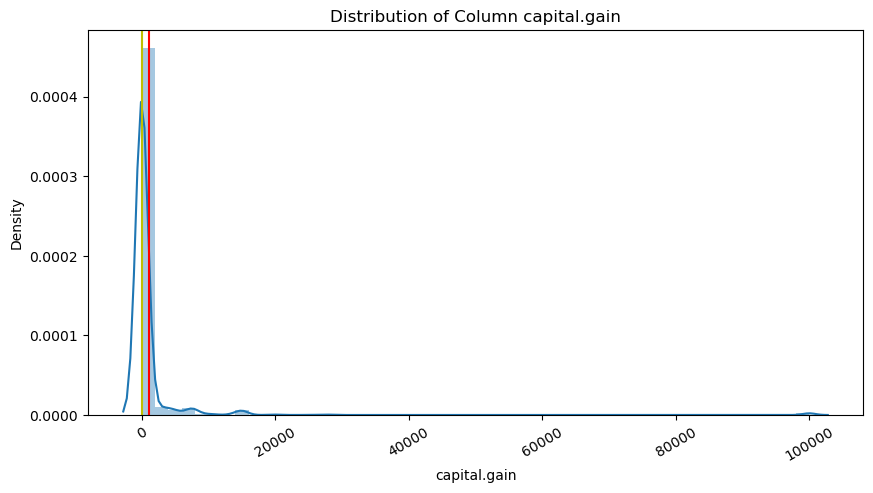

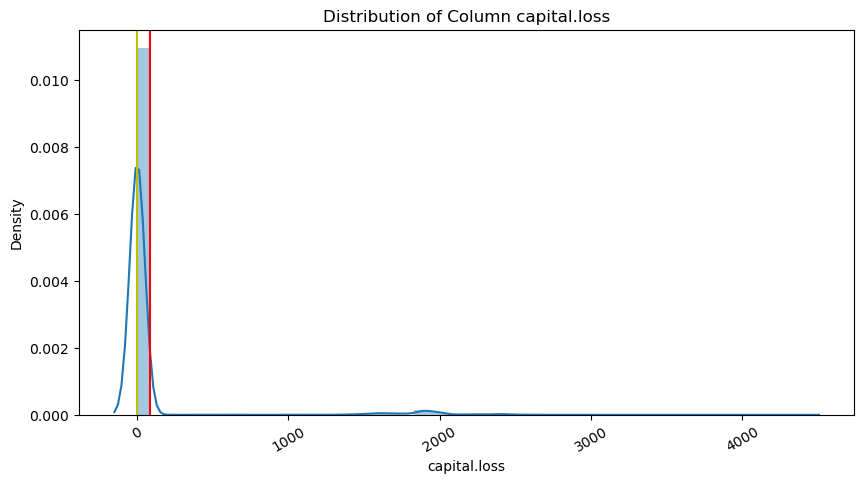

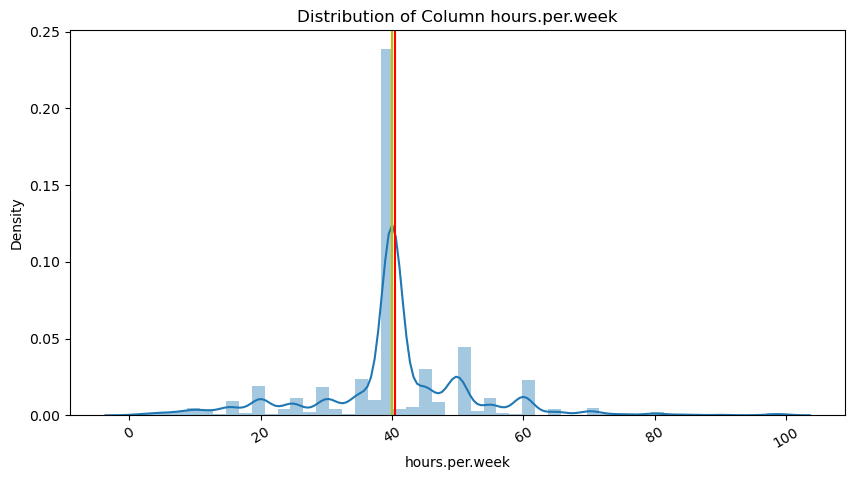

In [76]:
df_num = df.select_dtypes(include = "int")
for i in df_num:
    plt.figure(figsize = (10, 5))
    plt.xticks(rotation = 30)
    sns.distplot(df[i])
    plt.axvline(df[i].mean(), color = 'r')
    plt.axvline(df[i].median(), color = 'y')
    plt.title(f'Distribution of Column {i}')
    plt.show()

### Measures of Dispersion

In [79]:
# computing the range for each feature
df_num = df.select_dtypes(include=["int"])
for i in df_num:
    try:
        print(i, "range from : ", df[i].min(), "to ", df[i].max(), ", ", f"{i} data spread : {df[i].max() - df[i].min()}")
    except:
        pass

age range from :  17 to  90 ,  age data spread : 73
fnlwgt range from :  12285 to  1484705 ,  fnlwgt data spread : 1472420
education.num range from :  1 to  16 ,  education.num data spread : 15
capital.gain range from :  0 to  99999 ,  capital.gain data spread : 99999
capital.loss range from :  0 to  4356 ,  capital.loss data spread : 4356
hours.per.week range from :  1 to  99 ,  hours.per.week data spread : 98


1. The age range is from `17` to `90`, with a data spread of `73`.
2. The fnlwgt range is from `12,285` to `1,484,705`, with a data spread of `1,472,420`.
3. The years of education range from `1` to `16`, with a data spread of `15`.
4. The capital gain range is from `0` to `99,999`, with a data spread of `99,999`.
5. The capital loss range is from `0` to `4,356`, with a data spread of `4,356`.
6. The hours worked per week range from `1` to `99`, with a data spread of `98`.

### Measure of Shape

In [82]:
# Calculating the result of the skewness of each column
df_num = df.select_dtypes(include=["int"])
df_num.skew()

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
dtype: float64

1. The `age` feature has a skewness value of 0.558743, indicating a slightly right-tailed (positively skewed) distribution.
2. The `fnlwgt` feature has a skewness value of 1.446980, suggesting a more pronounced right-tailed distribution.
4. The `education.num` feature has a skewness value of -0.311676, indicating a slightly left-tailed (negatively skewed) distribution.
5. The `capital.gain` feature has a skewness value of 11.953848, which is a very high positive skewness, pointing to a distribution with a long right tail.
7. The `capital.loss` feature has a skewness value of 4.594629, also indicating a right-tailed distribution, but less extreme than the `capital.gain` feature.
9. The `hours.per.week` feature has a skewness value of 0.227643, suggesting a distribution that is close to symmetrical, with a slight right-tailed tendency.    

In [84]:
df_num = df.select_dtypes(include=["int"])
df_num.kurtosis()  

age                -0.166127
fnlwgt              6.218811
education.num       0.623444
capital.gain      154.799438
capital.loss       20.376802
hours.per.week      2.916687
dtype: float64

1. The `age` feature has a kurtosis value of -0.166127, which is close to 0. This indicates that the distribution of the `age` feature has a kurtosis that is relatively close to a normal distribution (mesokurtic).
2. The `fnlwgt` feature has a kurtosis value of 6.218811, which is significantly higher than 0. This suggests that the distribution of the `fnlwgt` feature has a higher and more peaked distribution (leptokurtic) compared to a normal distribution.
3. The `education.num` feature has a kurtosis value of 0.623444, which is also close to 0, indicating a distribution that is slightly more peaked than a normal distribution (slightly leptokurtic).
4. The `capital.gain` feature has an extremely high kurtosis value of 154.799438, which is indicative of a highly peaked and heavy-tailed distribution (leptokurtic).
5. The `capital.loss` feature has a kurtosis value of 20.376802, which is also quite high, suggesting a more peaked and heavy-tailed distribution compared to a normal distribution (leptokurtic).
6. The `hours.per.week` feature has a kurtosis value of 2.916687, which is higher than 0, implying a distribution that is more peaked than a normal distribution (leptokurtic).

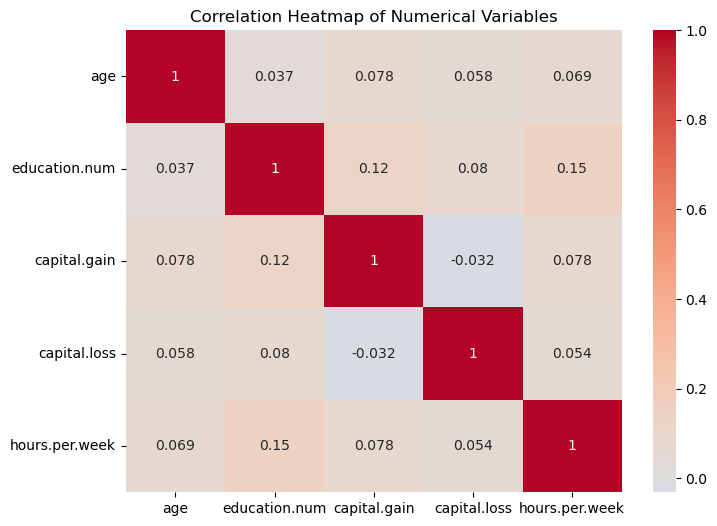

In [86]:
adult_df_numeric = df[['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]

# Generate the correlation matrix for numerical variables
correlation_matrix = adult_df_numeric.corr()

# Plot heatmap of correlation matrix for numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

1. The `age` feature has a weak positive correlation with `education.num` (0.037) and `capital.gain` (0.078), suggesting a slightly direct relationship between age, educational attainment, and capital gain.
2. The `education.num` feature has a weak positive correlation with `capital.gain` (0.12) and `hours.per.week` (0.15), indicating that higher educational levels are associated with slightly higher capital gains and more hours worked per week.
3. The `capital.gain` feature has a weak negative correlation with `capital.loss` (-0.032), implying an inverse relationship between capital gain and capital loss.
4. The `capital.loss` feature has a weak positive correlation with `hours.per.week` (0.054), suggesting a slightly direct relationship between capital loss and the number of hours worked per week.

### Visualization

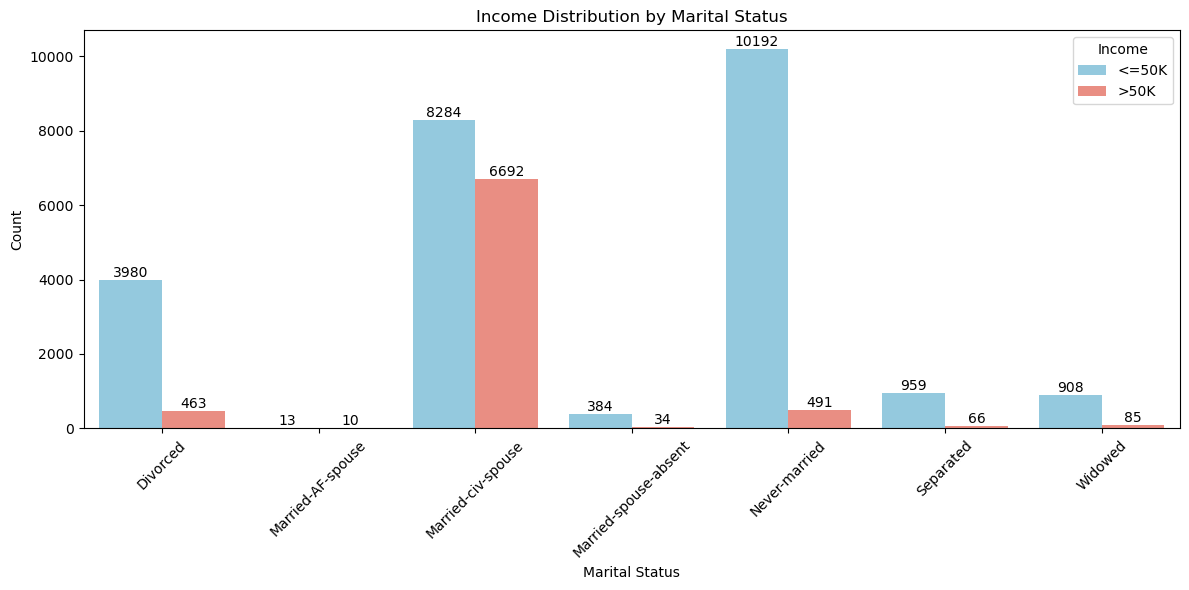

In [89]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='marital.status', hue='income', palette={'<=50K': 'skyblue', '>50K': 'salmon'})

# Add labels on top of each bar
for p in ax.patches:
    if p.get_x() == 0.0 and p.get_height() == 0:
        continue  # Skip the "Divorced" category with 0 count for income > 50K
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                rotation=0)

plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Income')
plt.tight_layout()  # Adjust the layout to fit the plot
plt.show()

1. Married-civ-spouse: This marital status has the highest overall count, with a significantly larger number of individuals earning above `$50K` compared to those earning below `$50K`.
2. Never-married: This category has the second-highest overall count, but the majority of individuals are in the `≤$50K` income group, indicating a higher prevalence of lower incomes among the never-married population.
3. Married: This category also shows a substantial number of individuals earning above `$50K`, suggesting that marriage is associated with higher earning potential.
4. Divorced: The divorced population has a relatively low overall count, with the majority earning `≤$50K`. This suggests that divorce may be linked to lower income levels.
5. Widowed and Separated: These categories have the lowest overall counts, with most individuals earning `≤$50K`.

Conclusion:
- The chart demonstrates a clear relationship between marital status and income levels. Married individuals, particularly those with a civil-spouse, tend to have a higher likelihood of earning above `$50K`, indicating that marriage and a stable spousal relationship may contribute to higher earning potential. Conversely, the never-married, divorced, widowed, and separated populations show a higher concentration in the `≤$50K` income group, suggesting that these marital statuses may be associated with lower income levels. This data provides valuable insights into the socioeconomic factors that influence individual earnings and can inform policy decisions and interventions aimed at improving financial outcomes across different marital status groups.

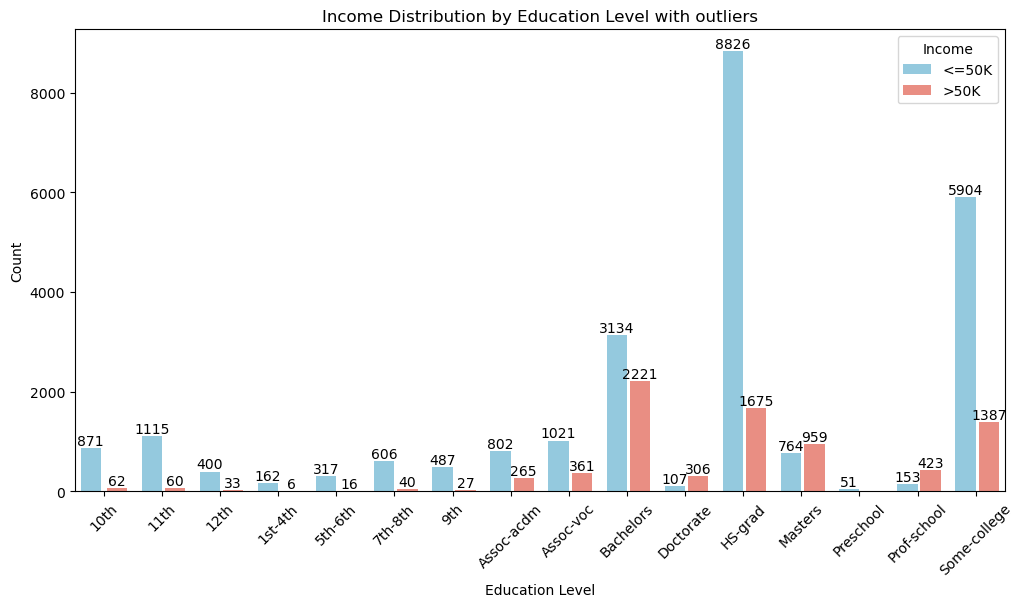

In [91]:
# Bar plot for income distribution by education level
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='education', hue='income', palette={'<=50K': 'skyblue', '>50K': 'salmon'})
plt.xticks(rotation=45)
plt.title('Income Distribution by Education Level with outliers')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Income')

# Adjusting the spacing between bars
for patch in ax.patches:
    width = 0.35  # Smaller width to create space between bars
    patch.set_width(width)
    # Adjust the position of each bar to create a gap
    if patch.get_x() > 0:
        patch.set_x(patch.get_x() + 0.05)

# Adding labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')  # '%d' for integer format

plt.show()

Insight:
1. Higher Education and Earnings Over 50K. Higher levels of education, such as Prof-School, Masters, and Doctorate, tend to have a higher number of individuals earning more than 50K.

2. Secondary Education and Low Income. Education such as HS-grad and Some-college have a much higher number of earnings <=50K than >50K. This shows that most people with secondary education are in the lower income group.

3. Effect of Education on Income. In general, the higher the level of education, the higher the probability of individuals earning >50K. However, there are some exceptions such as Assoc-voc (vocational education) which has a significant amount of earnings over 50K, indicating that vocational education also has good earning potential.

4. Low Education Level. People with low education such as Preschool, 1st-4th, and 5th-6th are almost all in the <=50K income bracket. This shows the limitations in earnings for individuals with very low education levels.

Conclusion

There is a positive correlation between education level and earnings: the higher the education, the greater the likelihood of earning above 50K.
Middle and lower education dominate the earning group below 50K, showing the importance of higher education to increase earning potential.
Vocational education such as Assoc-voc can be a good alternative for higher earnings, although not as high as academic education levels such as Bachelors or Masters.

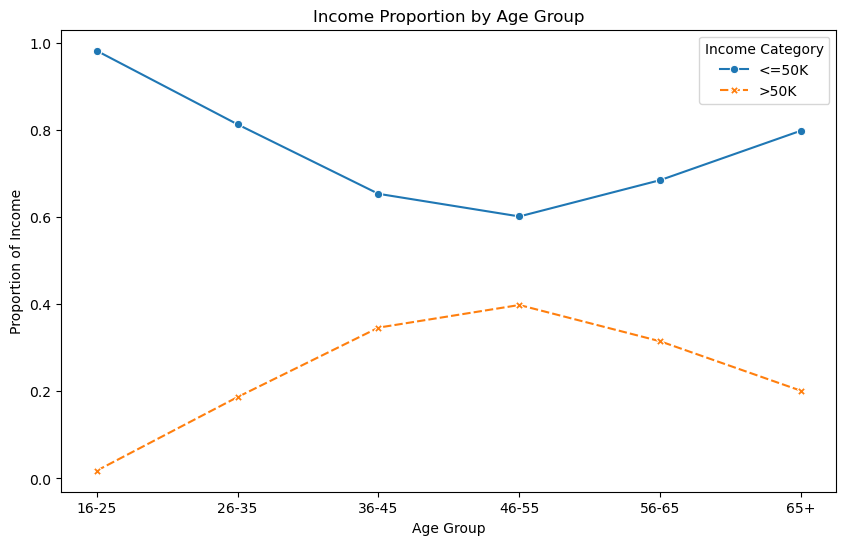

In [93]:
# Creating age groups
df['age_group'] = pd.cut(df['age'], bins=[16, 25, 35, 45, 55, 65, 90], labels=['16-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Calculating the proportion of income by age group
age_income_group = df.groupby(['age_group', 'income']).size().unstack().fillna(0)
age_income_group = age_income_group.div(age_income_group.sum(axis=1), axis=0)  # Convert to proportions

# Plotting the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_income_group, markers=True)
plt.title('Income Proportion by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Income')
plt.legend(title='Income Category')
plt.show()


Insight:
1. Young Age Group (16-25): Almost all people in this age group have an income of <=50K, with a proportion close to 1 or 100%. This could be due to the fact that people in this age group are generally just starting out and tend to have lower incomes.

2. Age Group 26-35 to 46-55: The proportion of people with incomes >50K increases gradually, peaking at age 46-55, where about 40% of this group has incomes above 50K. This could reflect career progression and increased income with experience and position.

3. Age Groups 56-65 and 65+: The proportion of income >50K decreases again at ages 56-65 and 65+, which may reflect that some people in these age groups are retired or experiencing a decline in income.

Conclusion

This graph shows that incomes >50K are generally more common in the middle age group (46-55) and start to decline again in older ages, while incomes <=50K are more common in younger and older age groups.

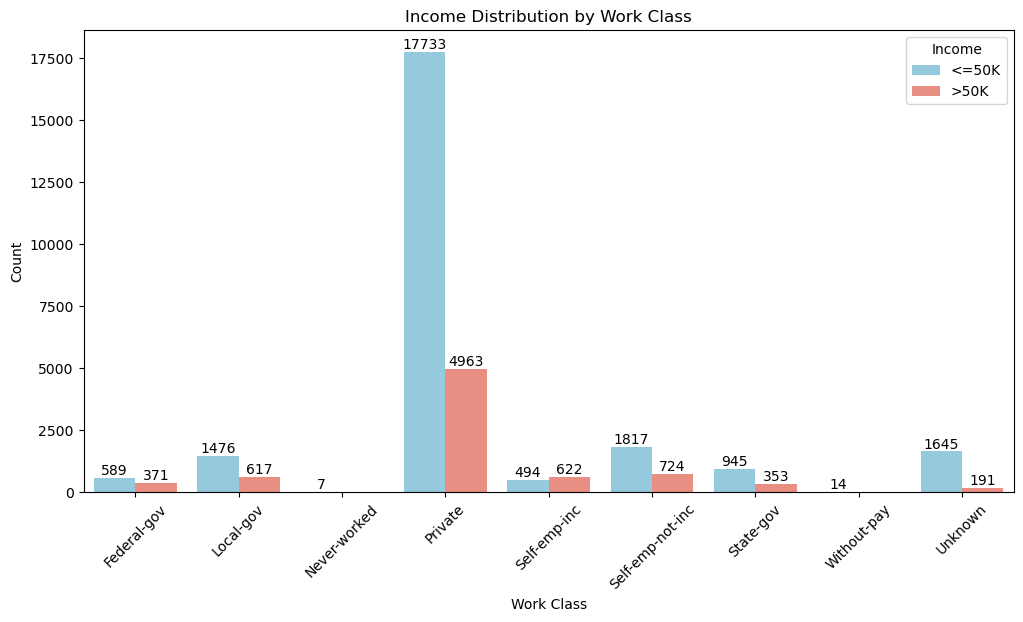

In [95]:
# Stacked bar plot for workclass and income distribution
plt.figure(figsize=(12, 6))
ax2 = sns.countplot(data=df, x='workclass', hue='income', palette={'<=50K': 'skyblue', '>50K': 'salmon'})
plt.xticks(rotation=45)
plt.title('Income Distribution by Work Class')
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.legend(title='Income')

# Adding labels on top of each bar
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge')  # '%d' for integer format

plt.show()

Insight:
1. Private Sector Dominance: Most individuals work in the private sector, with many earning ≤50K. While there are some earning >50K, they remain fewer.

2. Self-Employed Income: "Self-emp-inc" individuals earn >50K at a higher rate than "Self-emp-not-inc" individuals, suggesting incorporated self-employment correlates with higher earnings.

3. Government Jobs: Fewer people work in government roles, with local government having the highest count. Most earn ≤50K.

4. Non-Workers: Categories like "Never-worked" and "Without-pay" have low counts, mostly earning ≤50K.

5. Unknown Category: The "Unknown" category has a significant number, mainly earning ≤50K, potentially indicating missing or unclassified data that could affect analysis.

Conclusion

The private sector is the largest work class, with most individuals earning less than or equal to 50K. Self-employed individuals, especially those in incorporated businesses, show a higher proportion of individuals earning above 50K, potentially indicating higher earning potential.

### SUMMARY
Through this analysis, we not only identify the factors influencing income but also highlight the underlying societal patterns that contribute to economic inequality. This understanding can guide future policies and initiatives aimed at fostering equity in income distribution.

1. There's slightly **direct relationship between age, educational attainment, and capital gain**.
2. The chart demonstrates a clear relationship between marital status and income levels. **Married individuals tend to have a higher likelihood of earning above `$50K`**, indicating that marriage and a stable spousal relationship may contribute to higher earning potential.
3. **The higher the education, the greater the likelihood of earning above 50K**. Vocational education such as Assoc-voc can be a good alternative for higher earnings, although not as high as academic education levels such as Bachelors or Masters.
4. The graph shows that **incomes >50K are generally more common in the middle age group (46-55) and start to decline again in older ages**, while incomes <=50K are more common in younger and older age groups.
5. The private sector is the largest work class, with most individuals earning less than or equal to 50K. **Self-employed individuals, especially those in incorporated businesses, show a higher proportion of individuals earning above 50K, potentially indicating higher earning potential**.

In conclusion, age, education, marital status, and employment type significantly influence income levels, with higher education and stable marital relationships associated with greater earning potential, particularly in middle-aged individuals. The data shown provides valuable insights into the socioeconomic factors that influence individual earnings and can inform policy decisions and interventions aimed at improving financial outcomes across different groups.